# Import Python libs

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd as np_svd
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MI
from IPython.display import display
from math import sqrt
from itertools import cycle
from sklearn.metrics import *
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
RANDOM_STATE=345234

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 28)

# Loading Data

### Load data from csv file

In [3]:
data_table = pd.read_csv("cars.csv", index_col=0) # load data from csv
cars = data_table.copy()

### Data shape

In [4]:
data_table.shape

(93, 27)

### Features string description

In [5]:
descr = pd.read_csv("format.csv", index_col=0, sep=";")
descr["HasNulls"] = data_table.isnull().any()
pd.set_option('display.max_rows', 28)
pd.set_option('display.max_colwidth', 100)
display(descr)
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_colwidth', 50)

,type,description,HasNulls
feature,,,
Manufacturer,categorical,Manufacturer.,False
Model,categorical,Model.,False
Type,categorical,"Type: a factor with levels ""Small"", ""Sporty"", ""Compact"", ""Midsize"", ""Large"" and ""Van"".",False
Min.Price,numerical,"Minimum Price (in \$1,000): price for a basic version.",False
Price,numerical,"Midrange Price (in \$1,000): average of Min.Price and Max.Price.",False
Max.Price,numerical,"Maximum Price (in \$1,000): price for “a premium version”.",False
MPG.city,numerical,City MPG (miles per US gallon by EPA rating).,True
MPG.highway,numerical,Highway MPG.,False
AirBags,categorical,"Air Bags standard. Factor: none, driver only, or driver & passenger.",True


### Table represenation

In [6]:
data_table

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25.0,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18.0,25,NaN,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20.0,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19.0,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30,None,Front,4,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25,NaN,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
92,Volvo,240,Compact,21.8,22.7,23.5,21.0,28,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240
93,Volvo,850,Midsize,24.8,26.7,28.5,20.0,28,Driver & Passenger,Front,5,2.4,168,6200,2310,Yes,19.3,5,184,105,69,38,30.0,15.0,3245,non-USA,Volvo 850


# Data Study

### Description of numerical features

In [7]:
data_table.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,87.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.333333,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.474394,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


### Description of categorical features

In [8]:
data_table.describe(include=[np.object])

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
count,93,93,93,87,93,93,93,93,93
unique,32,93,6,3,3,6,2,2,93
top,Ford,LeMans,Midsize,Driver only,Front,4,Yes,USA,Nissan Sentra
freq,8,1,22,40,67,49,61,48,1


### Contingency tables

In [9]:
pd.set_option('display.max_rows', 33)

cat = [x for x in descr.loc[descr.type=="categorical"].index if x not in ["Manufacturer", "Model", "Make"]]
for feature in cat:
    if feature!= "DriveTrain":
        display(pd.crosstab(data_table[feature], data_table.DriveTrain, dropna=False, margins=True))
        
pd.set_option('display.max_rows', 8)

DriveTrain,4WD,Front,Rear,All
Type,,,,
Compact,1,13,2,16
Large,0,7,4,11
Midsize,0,17,5,22
Small,2,19,0,21
Sporty,2,7,5,14
Van,5,4,0,9
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
AirBags,,,,
Driver & Passenger,0,10,5,15
Driver only,5,25,10,40
None,5,26,1,32
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
Cylinders,,,,
3,1,2,0,3
4,4,41,4,49
5,0,2,0,2
6,5,20,6,31
8,0,2,5,7
rotary,0,0,1,1
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
Man.trans.avail,,,,
No,3,22,7,32
Yes,7,45,9,61
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
Origin,,,,
USA,5,34,9,48
non-USA,5,33,7,45
All,10,67,16,93


"Manufacturer" and "Origin" features can be omitted

In [10]:
display(data_table.groupby("Cylinders")["Horsepower"].mean())
display(data_table.groupby("Cylinders")["EngineSize"].mean())
display(data_table.groupby("Cylinders")["RPM"].mean())


Cylinders
3          66.000000
4         113.469388
5         138.500000
6         175.580645
8         234.714286
rotary    255.000000
Name: Horsepower, dtype: float64

Cylinders
3         1.166667
4         2.020408
5         2.450000
6         3.403226
8         4.842857
rotary    1.300000
Name: EngineSize, dtype: float64

Cylinders
3         5766.666667
4         5444.897959
5         5350.000000
6         5022.580645
8         4871.428571
rotary    6500.000000
Name: RPM, dtype: float64

Let rotary corresponds to 6 Cylinders now

In [11]:
for i in cars[cars.Cylinders=="rotary"].index:
    cars.loc[i,"Cylinders"] = 6

In [12]:
cars["AirBags"][cars["AirBags"].isnull()]="None"

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Feature selection

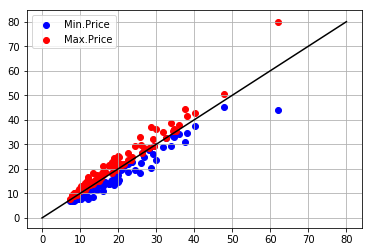

In [13]:
plt.scatter(data_table.Price, data_table["Min.Price"], color='b', label="Min.Price")
plt.scatter(data_table.Price, data_table["Max.Price"], color='r', label="Max.Price")
plt.plot([0,80],[0,80], color='k')
plt.legend()
plt.grid()
plt.show()

"Min.Price", "Max.Price" can be expressed via "Price"

In [14]:
# LabelEncoder seems to be buggy
def encode(drive_train):
    if drive_train == "Front": return 0
    if drive_train == "Rear": return 1
    if drive_train == "4WD": return 2
    raise Error("Unknown drive_train: {}".format(drive_train))

def decode(code):
    if code == 0: return "Front"
    if code == 1: return "Rear"
    if code == 2: return "4WD"
    raise Error("Unknown code: {}".format(code))
    
target = cars.DriveTrain.copy()
target[target=="Front"]=encode("Front")
target[target=="Rear"]=encode("Rear")
target[target=="4WD"]=encode("4WD")
target = target.astype('int')
target_s = cars.DriveTrain.copy()

In [15]:
num_features = descr[descr.type=="numerical"].index # numerical features: ['Min.Price','Price','Max.Price', ...,'Weight']
null_features = descr[descr.HasNulls].index # fateures with nulls ['MPG.city','AirBags',...,'Luggage.room']
features = cars[[x for x in num_features if x not in null_features]] # numerical without nulls
mi = MI(features, cars.DriveTrain, random_state=RANDOM_STATE)
mi_threshold = 0.085

remove_features = set(null_features)
for i,f in enumerate(features.columns):
    print("{} mi({:>18s})={:4.3f}".format("   " if mi[i]>0.085 else "[X]", f,mi[i]))
    if mi[i] < mi_threshold:
        remove_features.add(f)
remove_features.update({"Model", "Make", "Origin", "Manufacturer", "Max.Price", "Min.Price", "DriveTrain"})
remove_features.update({"Man.trans.avail","Cylinders", "Type", "AirBags"})
remove_features = remove_features - {"Manufacturer" }
pprint("removed features: {}".format(remove_features))
cars = cars[[x for x in cars.columns if x not in remove_features]]

    mi(         Min.Price)=0.097
    mi(             Price)=0.088
[X] mi(         Max.Price)=0.048
    mi(       MPG.highway)=0.162
    mi(        EngineSize)=0.118
    mi(        Horsepower)=0.109
    mi(               RPM)=0.103
[X] mi(      Rev.per.mile)=0.079
    mi(Fuel.tank.capacity)=0.207
    mi(        Passengers)=0.112
    mi(            Length)=0.107
[X] mi(         Wheelbase)=0.019
    mi(             Width)=0.158
[X] mi(       Turn.circle)=0.037
    mi(            Weight)=0.137
("removed features: {'MPG.city', 'DriveTrain', 'Turn.circle', 'Max.Price', "
 "'Rev.per.mile', 'Rear.seat.room', 'Man.trans.avail', 'Wheelbase', 'Make', "
 "'Cylinders', 'Model', 'Luggage.room', 'AirBags', 'Origin', 'Type', "
 "'Min.Price'}")


New description

In [16]:
pd.set_option('display.max_rows', 28)
pd.set_option('display.max_colwidth', 100)
new_descr = descr.loc[descr.index.isin(cars.columns)]
display(new_descr)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 50)

,type,description,HasNulls
feature,,,
Manufacturer,categorical,Manufacturer.,False
Price,numerical,"Midrange Price (in \$1,000): average of Min.Price and Max.Price.",False
MPG.highway,numerical,Highway MPG.,False
EngineSize,numerical,Engine size (litres).,False
Horsepower,numerical,Horsepower (maximum).,False
RPM,numerical,RPM (revs per minute at maximum horsepower).,False
Fuel.tank.capacity,numerical,Fuel tank capacity (US gallons).,False
Passengers,numerical,Passenger capacity (persons),False
Length,numerical,Length (inches).,False


# Normalization

One hot encoding

In [17]:
ncars = cars.copy()
categorical = new_descr[new_descr.type=="categorical"].index
binary_features = dict()
for feature in categorical:
    u_values = ncars[feature].unique()
    for uv in u_values:
        binary_features["{}_{}".format(feature,uv)] = len(u_values)
        ncars["{}_{}".format(feature,uv)] = ncars[feature]== uv
ncars = ncars[[x for x in ncars.columns if x not in categorical]]
ncars

,Price,MPG.highway,EngineSize,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Width,Weight,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,...,Manufacturer_Mercedes-Benz,Manufacturer_Mercury,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
1,15.9,31,1.8,140,6300,13.2,5,177,68,2705,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,33.9,25,3.2,200,5500,18.0,5,195,71,3560,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,29.1,26,2.8,172,5500,16.9,5,180,67,3375,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,37.7,26,2.8,172,5500,21.1,6,193,70,3405,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,30.0,30,3.5,208,5700,21.1,4,186,69,3640,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,19.7,21,2.5,109,4500,21.1,7,187,72,3960,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False
90,20.0,30,2.0,134,5800,18.5,5,180,67,2985,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False
91,23.3,25,2.8,178,5800,18.5,4,159,66,2810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False
92,22.7,28,2.3,114,5400,15.8,5,190,67,2985,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Range and scale transform

In [18]:
ncars = (ncars-ncars.mean())/(ncars.max()-ncars.min())
for feature, n in binary_features.items():
    ncars[feature] = ncars[feature]/sqrt(n)
display(ncars)

,Price,MPG.highway,EngineSize,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Width,Weight,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,...,Manufacturer_Mercedes-Benz,Manufacturer_Mercury,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
1,-0.066233,0.063799,-0.184626,-0.015624,0.377539,-0.194636,-0.014337,-0.079542,-0.076464,-0.152657,0.172975,-0.003802,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,-0.007603,-0.003802
2,0.264043,-0.136201,0.113246,0.229274,0.081243,0.075027,-0.014337,0.151227,0.090203,0.202115,0.172975,-0.003802,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,-0.007603,-0.003802
3,0.175969,-0.102867,0.028140,0.114988,0.081243,0.013229,-0.014337,-0.041081,-0.132019,0.125351,-0.003802,0.172975,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,-0.007603,-0.003802
4,0.333767,-0.102867,0.028140,0.114988,0.081243,0.249184,0.152330,0.125586,0.034648,0.137799,-0.003802,0.172975,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,-0.007603,-0.003802
5,0.192483,0.030466,0.177076,0.261927,0.155317,0.249184,-0.181004,0.035842,-0.020908,0.235310,-0.003802,-0.003802,0.174876,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,-0.007603,-0.003802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.003492,-0.269534,-0.035690,-0.142155,-0.289128,0.249184,0.318996,0.048663,0.145759,0.368090,-0.003802,-0.003802,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,0.169173,-0.003802
90,0.008997,0.030466,-0.142073,-0.040114,0.192354,0.103117,-0.014337,-0.041081,-0.132019,-0.036474,-0.003802,-0.003802,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,0.169173,-0.003802
91,0.069547,-0.136201,0.028140,0.139478,0.192354,0.103117,-0.181004,-0.310312,-0.187575,-0.109088,-0.003802,-0.003802,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,0.169173,-0.003802
92,0.058538,-0.036201,-0.078243,-0.121747,0.044205,-0.048568,-0.014337,0.087124,-0.132019,-0.036474,-0.003802,-0.003802,-0.001901,-0.007603,...,-0.003802,-0.003802,-0.003802,-0.007603,-0.007603,-0.001901,-0.009504,-0.001901,-0.001901,-0.005702,-0.001901,-0.007603,-0.007603,0.172975


# Split train test

In [19]:
from sklearn.model_selection import train_test_split
ncars_train, ncars_test, y_train, y_test = train_test_split(ncars, target, test_size=0.33, stratify=target, 
                                                            random_state=RANDOM_STATE)


# Decision Tree Classifier

In [20]:
from sklearn import tree
classifier1 = tree.DecisionTreeClassifier(random_state=RANDOM_STATE+2345)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=1)

In [22]:
from sklearn.svm import LinearSVC
classifier3 = LinearSVC(random_state=0, penalty='l2', loss='squared_hinge', dual=True)

In [23]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
classifier4 = NearestCentroid(metric='euclidean', shrink_threshold=None)

In [96]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances as dist

class ClusterClassifier(BaseEstimator, ClassifierMixin):
    
    class Cluster():
        def __init__(self, label, X, y, clazz):
            self.label = label
            self.X = x
            self.y = y
            self.center = X.mean(axis=0)
#             values,counts = np.unique(y,return_counts=True)
#             ind=np.argmax(counts)
#             self.clazz = values[ind]
            self.clazz = clazz
        
        def __str__(self):
            return "Cluster [label={};y={};clazz={}]".format(self.label, self.y, self.clazz)
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        if y is None:
            raise ValueError("y is None")
        X = X.as_matrix()
        classes = np.unique(y)
        k = len(classes)
        init_points = []
        for clazz in classes:
            point = X[y==clazz].mean(axis=0)
            init_points.append(point)
        self.kmeans_ = KMeans(n_clusters=k, init=np.array(init_points), n_init=1, max_iter=500, random_state=RANDOM_STATE)
        self.kmeans_.fit(X)
        labels = np.unique(self.kmeans_.labels_)
        self._clusters = []
        for clazz, label in zip(classes,labels):
            new_cluster = ClusterClassifier.Cluster(label, X[self.kmeans_.labels_==label], y[self.kmeans_.labels_==label], clazz)
            self._clusters.append(new_cluster)
        return self
        
    def _predict_one(self, x):        
        return max(self._clusters, key=lambda c: np.linalg.norm(c.center-x)).clazz
    
    def predict(self, X, y=None):
        res = []
        X = X.as_matrix()
        for x in X:
            res.append(self._predict_one(x))
        return np.array(res)

classifier5 = ClusterClassifier()

In [105]:
classifier = classifier1
classifier.fit(ncars_train, y=y_train)
y_pred = classifier.predict(ncars_test)
print("test accuracy = {}".format(accuracy_score(y_test, y_pred)))
labels = range(0,3)
index = [decode(x) for x in labels]
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), 
                        index=[x+" actual" for x in index], 
                        columns=[x+" pred" for x in index])
display(c_matrix)

test accuracy = 0.8387096774193549


,Front pred,Rear pred,4WD pred
Front actual,21,1,1
Rear actual,3,2,0
4WD actual,0,0,3


In [106]:
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(classifier, X=ncars, y=target, cv=10, scoring=make_scorer(accuracy_score)).mean()
print("mean cv accuracy = {}".format(cv_accuracy))

mean cv accuracy = 0.8213888888888888


# SVD plot

In [26]:
def plot(ax, data, labels=None, title="",legend=True):
    colors = cycle(['b','r','g','y','k','m','tan','olive','goldenrod'])
    markers = cycle('os*pPh')
    if labels is None:
        labels = np.zeros(len(data))
    ulabels = set(labels)
    cols = dict()
    marks = dict()
    for label in ulabels:
        cols[label] = next(colors)
        marks[label] = next(markers)
    maxx, minx = max(data[:, 0]), min(data[:, 0])
    range_x = maxx - minx
    maxy, miny = max(data[:, 1]), min(data[:, 1])
    range_y = maxy - miny
    unique = np.unique(labels)
    for label in unique:
        ax.scatter(data[labels == label][:, 0], data[labels == label][:, 1],
                   marker=marks[label],
                   color=cols[label], label=label if len(unique)>1 else None)
    ax.set_title(title)
    ax.set_xlim(minx - 0.2 * range_x, maxx + 0.2 * range_x)
    ax.set_ylim(miny - 0.2 * range_y, maxy + 0.2 * range_y)
    ax.grid(linestyle='dotted')
    if legend:
        ax.legend()


def plot_svd(data, labels=None, legend=False):
    u, s, v = np_svd(data)
    s[1] = -s[1]
    fig, ax = plt.subplots(figsize=(7,4))
    plot(ax, u[:, 0:2] * s[0:2], title="", labels=labels, legend=legend)
    

def plot_tsne(data, labels=None, legend=False):
    from sklearn.manifold import TSNE
    embedded = TSNE(n_components=2).fit_transform(data)
    fig, ax = plt.subplots(figsize=(7,4))
    plot(ax, embedded, title="", labels=labels, legend=legend)
    
def plot_mds(data, labels=None, legend=False):
    from sklearn.manifold import MDS
    mds = MDS(n_components=2, max_iter=100, n_init=1)
    embedded = mds.fit_transform(data)
    fig, ax = plt.subplots(figsize=(7,4))
    plot(ax, embedded, title="", labels=labels, legend=legend)


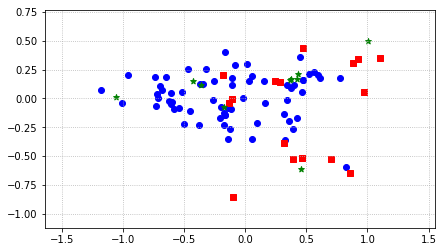

In [27]:
plot_svd(ncars, labels=target)
plt.show()